<a href="https://colab.research.google.com/github/saranourizadeh/New-york-taxi-trip-duration/blob/main/New_York_Taxi_Trip_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal: finish it clearly!!!
just finish as good as I start

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
import warnings
warnings.filterwarnings("ignore")

##import Data

refrence of data: https://www.kaggle.com/competitions/nyc-taxi-trip-duration

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Public/data science project/NYC Taxi trip duration/train-2.csv")



In [ ]:
backup_data = pd.read_csv("/content/drive/MyDrive/Public/data science project/NYC Taxi trip duration/train-2.csv")

In [ ]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [ ]:
data.duplicated().sum()

0

In [ ]:
# y = data['trip_duration']

In [ ]:
# data.drop('trip_duration', axis = 1, inplace = True)



##we split our data: 70% train, 15% validation, 15% test

In [ ]:


# / x_train, y_train, x_test, y_test = train_test_split(data, y, test_size = 0.15 ) 

In [ ]:

data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record --> [2, 1]
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


besed on above information, there is no null!

In [ ]:
data['vendor_id'].unique()

array([2, 1])

In [ ]:
type(data['pickup_datetime'][0])

str

##convert string to date and time of pandas
It's better to convert string of datetime to data and time format in pandas!

In [ ]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])




##Detecting outlier

In [ ]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

#####passenger count numbers of 7 and 9 and 0 and 8 are outliers and we don't have eanough data about trip including 7,9,0,8 passengers, then it is better to remove them.

In [ ]:
data = data.loc[data['passenger_count'] != 0]
data = data.loc[data['passenger_count'] != 7]
data = data.loc[data['passenger_count'] != 9]
data = data.loc[data['passenger_count'] != 8]

In [ ]:
data['vendor_id'].value_counts()

2    780268
1    678311
Name: vendor_id, dtype: int64

In [ ]:
float_variable = ['dropoff_latitude','dropoff_longitude','pickup_longitude', 'pickup_latitude']

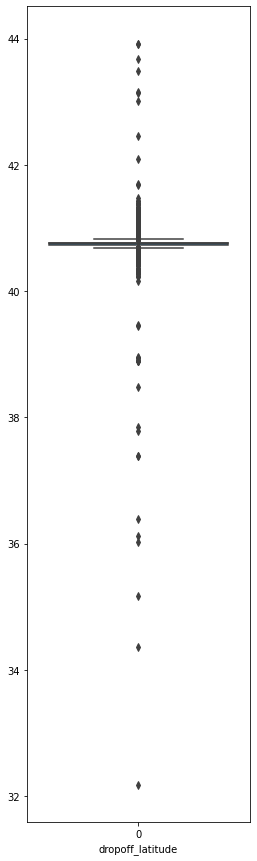

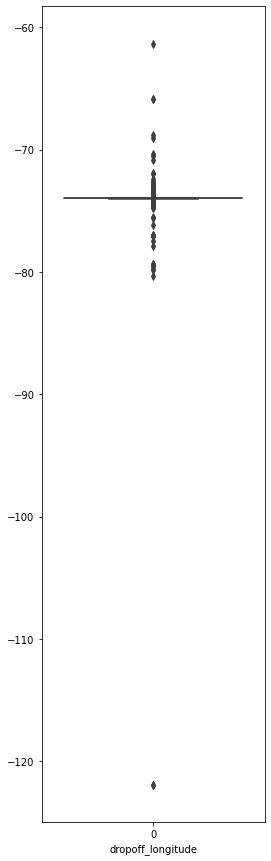

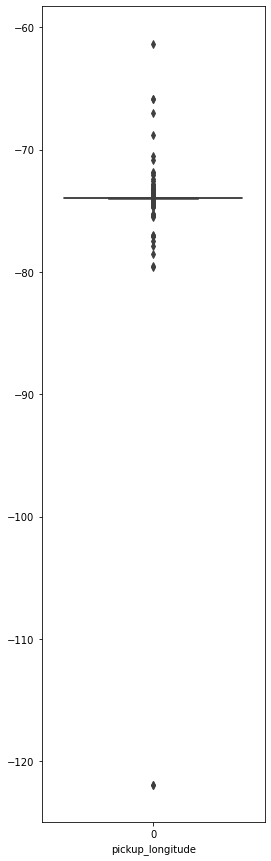

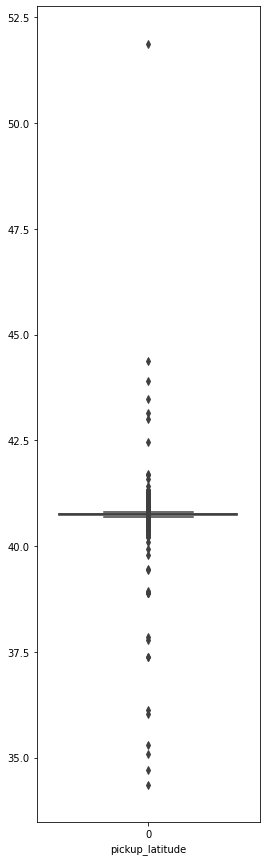

In [ ]:

for feature in float_variable:
  plt.figure(figsize = (4,15))
  sns.boxplot(data = data[feature])
  plt.xlabel(feature)


to remove outlines based on boxplot:

In [ ]:
data = data[data['dropoff_latitude']>36]

data = data[data['dropoff_longitude']>-85]

data = data[data['pickup_latitude']<47]

data = data[data['pickup_longitude']>-85]


In [ ]:
data.shape

(1458573, 11)

plot again to see data after removing too far outline

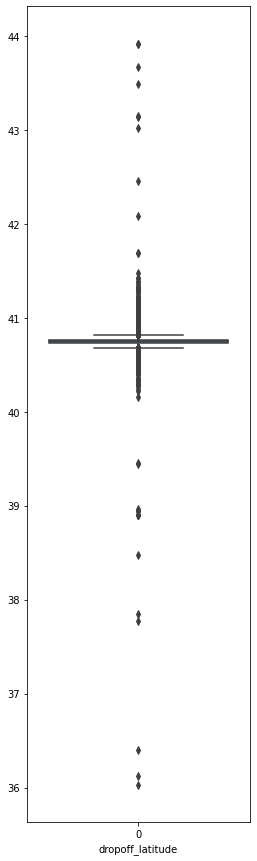

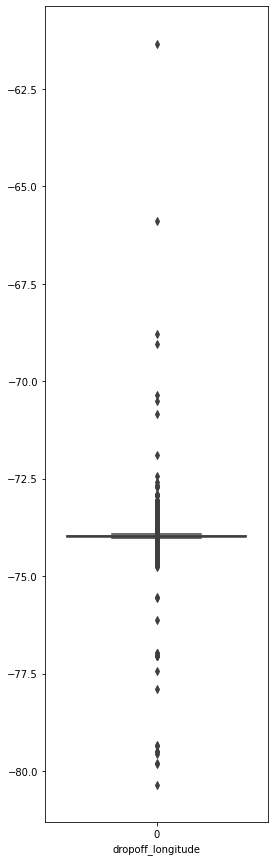

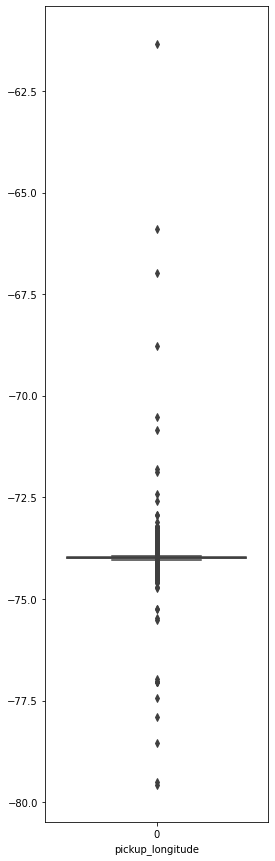

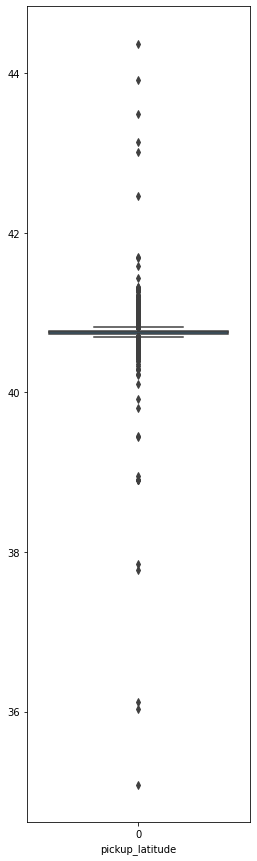

In [ ]:
for feature in float_variable:
  plt.figure(figsize = (4,15))
  sns.boxplot(data = data[feature])
  plt.xlabel(feature)


now data is in logical renge and no need to remove more data based on above features.


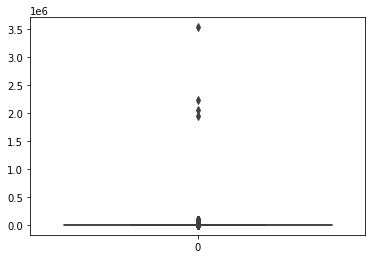

In [ ]:
sns.boxplot(data = data['trip_duration'])
plt.show()

we have some outliers here and we should delete them.

In [ ]:
data = data[data['trip_duration']<500000]

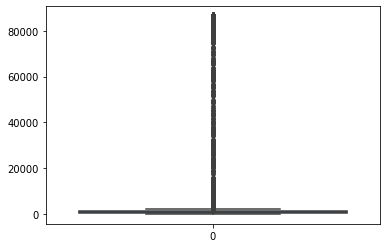

In [ ]:

sns.boxplot(data = data['trip_duration'])
plt.show()

In [ ]:
data.shape

(1458569, 11)

we will check this feature outlind later again based on other plot.

##Feature Engineering


###1.check for correlation

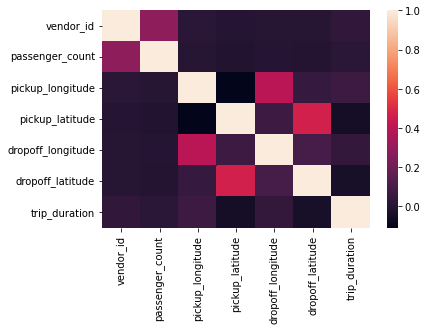

In [ ]:

corr = data.corr()

sns.heatmap(corr)

as we can see on above heatmap plot, there is no special correlation between features.

###2.check distrubution of data and features

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# sns.displot(data['trip_duration'])

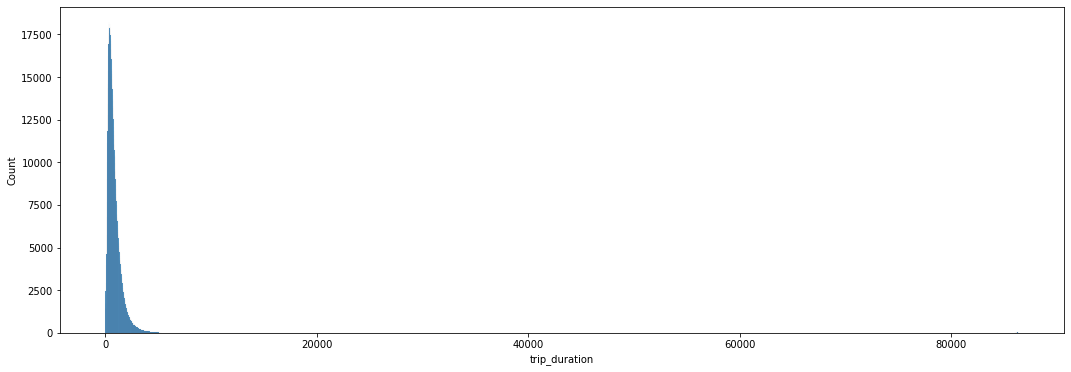

In [ ]:
plt.figure(figsize=(18,6))

sns.histplot(data['trip_duration'])

from above plot we can underestand that we still lots of outlier, then we can't see trip_duration distribution.then I think it's better to remove them.

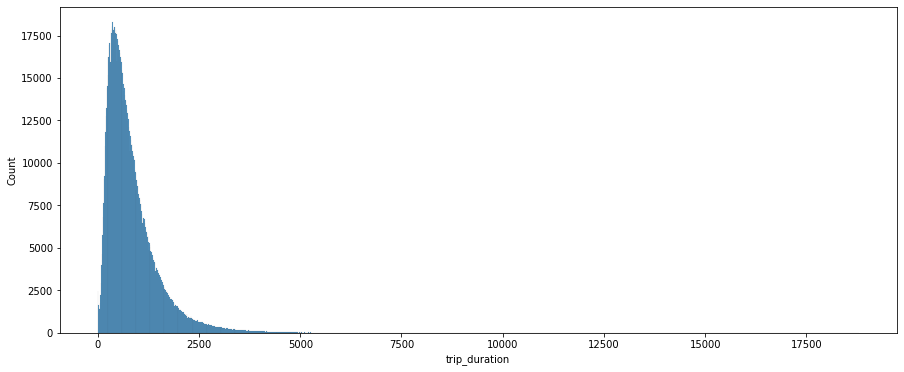

In [ ]:
plt.figure(figsize = (15,6))
data = data[data['trip_duration']<20000]

sns.histplot(data['trip_duration'])

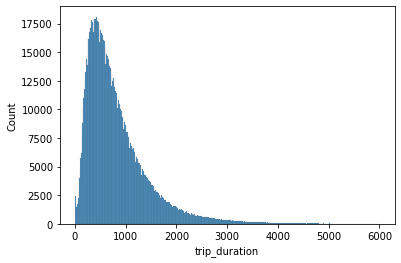

In [ ]:
data = data[data['trip_duration']<6000]

sns.histplot(data['trip_duration'])

now I think it's good now and no more outliers! now as we can see our plot is right skewed, we use Log transform for this column to solve the problem.

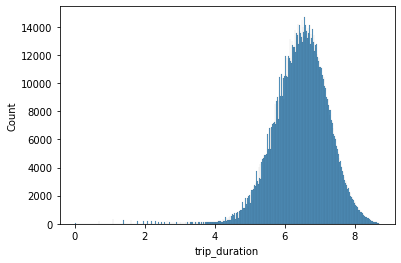

In [ ]:
# Log transform for trip_duraion column 

data['trip_duration'] = np.log(data['trip_duration'])


sns.histplot(data['trip_duration'])

now it has normal distribution and it is ready for analyze!

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

vedor_id , store_and_fwd_flag are categorical data and we should convert them by one-hot encoding.

first we want to change store_and_fwd_flag to one_hot_encoding!


In [ ]:
data = pd.concat([data, pd.get_dummies(data['store_and_fwd_flag'])], axis = 1)

In [ ]:
data.drop('store_and_fwd_flag', axis = 1, inplace = True)

In [ ]:
data = pd.concat([data, pd.get_dummies(data['vendor_id'])], axis = 1)

In [ ]:
data.drop('vendor_id', axis = 1, inplace = True)

It's preferred to have data and time exactly to analyse , as trip duration is denpendent of time and day!


In [ ]:
data['month'] = data.pickup_datetime.dt.month
data['week'] = data.pickup_datetime.dt.week
data['weekday'] = data.pickup_datetime.dt.weekday
data['hour'] = data.pickup_datetime.dt.hour
data['minute'] = data.pickup_datetime.dt.minute
data['minute_oftheday'] = data['hour'] * 60 + data['minute']
data.drop(['minute'], axis=1, inplace=True)


In [ ]:
data['month_'] = data.dropoff_datetime.dt.month
data['week_'] = data.dropoff_datetime.dt.week
data['weekday_'] = data.dropoff_datetime.dt.weekday
data['hour_'] = data.dropoff_datetime.dt.hour
data['minute_'] = data.dropoff_datetime.dt.minute
data['minute_oftheday_'] = data['hour_'] * 60 + data['minute_']
data.drop(['minute_'], axis=1, inplace=True)

In [ ]:
data.drop(['pickup_datetime'], axis=1, inplace=True)

we drop column of detail of drop_out bcs test set of Kaggle has no detail about this column! then it's better to not use that.

In [ ]:
data.drop(['dropoff_datetime'], axis=1, inplace=True)

I learned to calculate distance on the earth and direction from this refrence:
https://www.kaggle.com/code/quentinmonmousseau/ml-workflow-lightgbm-0-37-randomforest-0-39
and below code is from his workflow.

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

In [ ]:
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

add distance as a new feature

In [ ]:
data['distance'] = ft_haversine_distance(data['pickup_latitude'].values,
                                                 data['pickup_longitude'].values, 
                                                 data['dropoff_latitude'].values,
                                                 data['dropoff_longitude'].values)

calculate direction of trip.

In [ ]:
def ft_degree(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371 #km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


add direction as a new feature.

In [ ]:
data['direction'] = ft_degree(data['pickup_latitude'].values,
                                data['pickup_longitude'].values,
                                data['dropoff_latitude'].values,
                                data['dropoff_longitude'].values)

check for outliers of distance

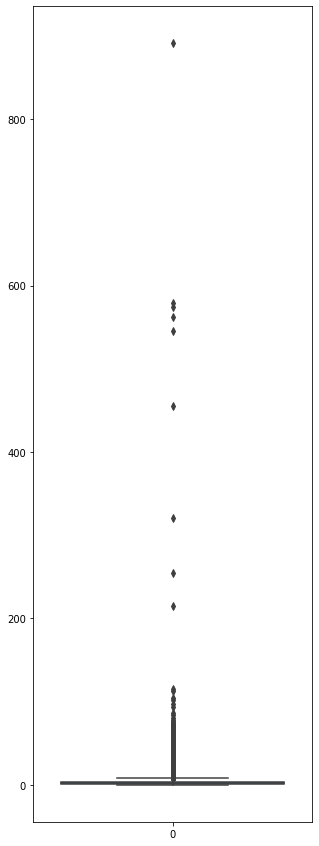

In [ ]:
plt.figure(figsize = (5,15))
sns.boxplot(data = data['distance'])

In [ ]:
data = data[ data['distance']<200]

In [ ]:
data.shape

(1455998, 23)

###split data

In [ ]:
y = data['trip_duration']

data.drop(['trip_duration'], inplace = True, axis = 1)

data.drop(['id'], inplace = True, axis = 1)

x = data

In [ ]:
y.shape

(1455998,)

In [ ]:
x.shape

(1455998, 21)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [ ]:
x_test.shape

(218400, 21)

In [ ]:
y_test.shape

(218400,)

15% for validation

do not forget to do cross validation

linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
reg.score(x_test, y_test)

0.4253104794754621

In [ ]:
reg.score(x_train, y_train)

0.4319231047689256

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
print(gb.score(x_train, y_train))
gb.score(x_test, y_test)


0.7477402773385533


0.7459209289367522

In [ ]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,N,Y,1,2,month,...,weekday,hour,minute_oftheday,month_,week_,weekday_,hour_,minute_oftheday_,distance,direction
0,1,-73.982155,40.767937,-73.964630,40.765602,1,0,0,1,3,...,0,17,1044,3,11,0,17,1052,1.498521,99.970196
1,1,-73.980415,40.738564,-73.999481,40.731152,1,0,1,0,6,...,6,0,43,6,23,6,0,54,1.805507,-117.153768
2,1,-73.979027,40.763939,-74.005333,40.710087,1,0,0,1,1,...,1,11,695,1,3,1,12,730,6.385098,-159.680165
3,1,-74.010040,40.719971,-74.012268,40.706718,1,0,0,1,4,...,2,19,1172,4,14,2,19,1179,1.485498,-172.737700
4,1,-73.973053,40.793209,-73.972923,40.782520,1,0,0,1,3,...,5,13,810,3,12,5,13,818,1.188588,179.473585


neural network

In [ ]:
import xgboost as xgb

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(x_train, y_train)

XGBRegressor(verbosity=0)

In [ ]:
score = xgbr.score(x_train, y_train)  
print("Training score: ", score)

Training score:  0.7478349554415535


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.75


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)




MSE: 0.15


In [ ]:
df.to_pickle("./main_df.pkl")

df_route.to_pickle("./route_df.pkl")


df = pd.read_pickle("./main_df.pkl")

df_route = pd.read_pickle("./route_df.pkl")

CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

In [ ]:
data.shape

(1455998, 21)

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(21,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.fit(x_train, y_train, batch_size=12,epochs=100, verbose=0)

In [ ]:
y_pred = model.predict(x_test)          